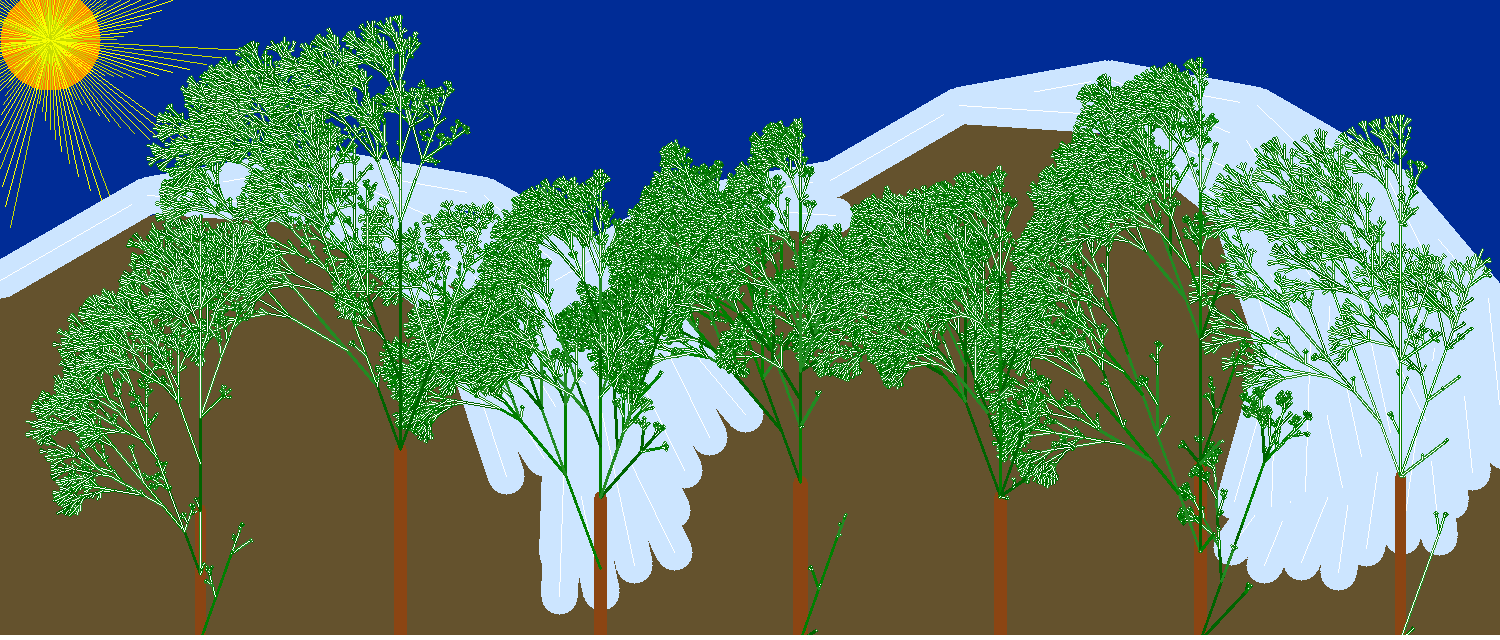

In [ ]:
import cv2
import random
import numpy as np
from google.colab.patches import cv2_imshow
import math

width = 1500
height = 640

leafColors = [(0, 100, 0),(0,128,0),(34,139,34)]

def sun(img,x,y,l,a,sl,da,n):
    if n == 0:
        return
    x2 = x + l
    y2 = y
    ar = math.radians(a)
    coseno = math.cos(ar)
    seno = math.sin(ar)
    xrot = (x2 - x) * seno + (y2 - y) * coseno
    yrot = (x2 - x) * coseno - (y2 - y) * seno
    x2 = xrot + x
    y2 = yrot + y
    if random.randrange(0, 2) == 0:
        cv2.line(img, (int(x), int(y)), (int(x2), int(y2)), (0, 255, 247), (1))
    else:
        cv2.line(img, (int(x), int(y)), (int(x2), int(y2)), (0, 220, 200), (1))
    sun(img, x, y, l * sl, a - da, sl, da, n - 1)
    return

def drawMountain(img,x,y,l,a,sl,da,n):
    if n == 0:
        return
    x2 = x + l
    y2 = y
    ar = math.radians(a)
    coseno = math.cos(ar)
    seno = math.sin(ar)
    xrot = (x2 - x) * seno + (y2 - y) * coseno
    yrot = (x2 - x) * coseno - (y2 - y) * seno
    x2 = xrot + x
    y2 = yrot + y
    cv2.line(img, (int(x),int(y)), (int(x2),int(y2)), (255, 229, 204), (35))
    cv2.line(img, (int(x),int(y)), (int(x2),int(y2)), (255,255,255), (1))
    if(y > 280):
        return
    drawMountain(img, x2, y2, l + sl, a - da, sl, da, n - 1)
    drawMountain(img, x2, y2, l + sl, a - 1.7 * da, sl, da, n - 1)
    return

def drawTree(img, x, y, l, a, sl, da, n, isWood):
    if n == 0:
        return

    x2 = x + l
    y2 = y
    ar = math.radians(a)

    coseno = math.cos(ar)
    seno = math.sin(ar)
    xrot = (x2 - x) * seno + (y2 - y) * coseno
    yrot = (x2 - x) * coseno - (y2 - y) * seno

    x2 = xrot + x
    y2 = yrot + y


    if isWood:
        cv2.line(img, (int(x), int(y)), (int(x2), int(y2)), (19, 69, 139), n)
    else:
        leafColorPosition = random.randrange(0, 3)
        cv2.line(img, (int(x), int(y)), (int(x2), int(y2)), leafColors[leafColorPosition], 2)
    
    if n <= 8:
        cv2.line(img, (int(x), int(y)), (int(x2), int(y2)), (255, 255, 255), 1)

    treeType1 = random.randrange(0, 2)
    treeType2 = random.randrange(0, 2)

    #First branch
    if treeType1 == 0:
        drawTree(img, x2, y2, l * sl, a - da, sl * random.random(), da * (random.random() + 1), n - 1, False)
    else:
        drawTree(img, x, y, l * sl, a - da, sl * random.random(), da * (random.random() + 1), n - 1, False)

    #Second branch
    if treeType2 == 0:
        drawTree(img, x2, y2, l * sl, a + da, sl, da, n - 1, False)
    else:
        drawTree(img, (x + x2) / 2, (y + y2) / 2, l * sl, a + da, sl, da, n - 1, False)

    #Third branch
    drawTree(img, x2, y2, l * sl, a, sl, da, n - 1, False)

    return

img = np.zeros((height, width, 3), dtype='uint8')
cv2.rectangle(img, (0,0), (width, height), (150,44,0), (-1))

cv2.circle(img,(int(260), int(600)), int(400), (45, 82, 100), -1)
cv2.circle(img,(int(1200), int(600)), int(400), (45, 82, 100), -1)
cv2.circle(img,(int(1000), int(521)), int(400), (45, 82, 100), -1)
cv2.circle(img,(int(685), int(300)), int(100), (45, 82, 100), -1)

cv2.circle(img,(int(50), int(40)), int(50), (0,128,255), -1)
sun(img, 50, 40, 200, 120, 0.99, 33, 150)

drawMountain(img, 0, 280, 170, 120, 0.8, 20, 15)
drawMountain(img, 555, 280, 150, 120, 0.8, 20, 2)
drawMountain(img, 830, 180, 150, 120, 0.8, 20, 8)

for i in range(0, 7):
    drawTree(img, width - (100 + (200 * i)), height, random.randrange(130, 201), 180, 0.7, 20, random.randrange(9, 14), True)

cv2.line(img, (int(0), int(height)), (int(width), int(height)), (255, 255, 255), 10)

cv2_imshow(img)
